In [1]:
import os
import pandas as pd
import numpy as np

from utils.datatools import *

In [2]:
SAVEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
CONTROL_PATH = os.path.join(SAVEPATH, "Controls")
PD_PATH = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(CONTROL_PATH) == False: os.mkdir(CONTROL_PATH)
if os.path.exists(PD_PATH) == False: os.mkdir(PD_PATH)

In [3]:
patients = getPatientsTable()
# patients.head()

In [4]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [5]:
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


In [6]:
error_cate = []
error_name = []
error_type = []
def generatePhase(dataFrame, TARGET_CATE, PATH):
    def generateDiffPhase(dataList, PATH, filenamePrefix):
        for idx, data in enumerate(dataList):
            
            df = data.copy()
            
            prevDiffList_LHEE = [ df.iloc[idx+1]["LHEE_Z"] - df.iloc[idx]["LHEE_Z"] for idx in range(len(df)-1) ]
            prevDiffList_RHEE = [ df.iloc[idx+1]["RHEE_Z"] - df.iloc[idx]["RHEE_Z"] for idx in range(len(df)-1) ]

            df["LHEE_Z_DIFF"] = [None] + prevDiffList_LHEE
            df["RHEE_Z_DIFF"] = [None] + prevDiffList_RHEE
            
            phase = [None]

            for l_diff, r_diff in zip(df["LHEE_Z_DIFF"][1:], df["RHEE_Z_DIFF"][1:]):
                # split phase
                
                if l_diff != None and r_diff != None:
                    if l_diff >= 0 and r_diff >= 0: phase.append(1)
                    if l_diff >= 0 and r_diff < 0: phase.append(2)
                    if l_diff < 0 and r_diff >= 0: phase.append(3)
                    if l_diff < 0 and r_diff < 0: phase.append(4)
                else:
                    phase.append(None)

#             df["PHASE"] = phase + [None]*(len(df) - len(phase))
            df["PHASE"] = phase
            df.to_csv(os.path.join(PATH, f"{filenamePrefix}{idx+1}.csv"), index=False)
        
    for patient_initial in dataFrame["Patient"]:
#         print(patient_initial)
        BWdata, FWdata = getPatientData(TARGET_CATE, patient_initial)

        try: generateDiffPhase(BWdata, PATH, f"PHASE_{patient_initial}_BW")
        except: 
            print(patient_initial+"_BW")
            error_cate.append(TARGET_CATE)
            error_name.append(patient_initial)
            error_type.append("BW")
        
        try: generateDiffPhase(FWdata, PATH, f"PHASE_{patient_initial}_FW")
        except: 
            print(patient_initial+"_FW")
            error_cate.append(TARGET_CATE)
            error_name.append(patient_initial)
            error_type.append("FW")

In [7]:
generatePhase(CONTROL, "Controls", CONTROL_PATH)
generatePhase(PD, "PD", PD_PATH)

ddt = pd.DataFrame({"Patient" : error_name, "Category": error_cate, "FW_BW": error_type})
ddt.to_csv(os.path.join(SAVEPATH, "error.csv"), index=False)

ODS_FW
SHI_BW
BGH_FW
BYH_BW
CJH_FW
CKC_FW
JBS_BW
JWS_BW
KDY_BW
KJI_BW
KJS_BW
KMS_BW
LDY_FW
LJS_FW
SGS2_FW
SGS_BW
SGS_FW
SKH_FW
SSB_FW
YSC_FW


----

### TEST

In [11]:
BWdata, FWdata = getPatientData("PD", "BGH")

In [22]:
data = FWdata[0]
df = data.copy()
            
prevDiffList_LHEE = [ df.iloc[idx+1]["LHEE_Z"] - df.iloc[idx]["LHEE_Z"] for idx in range(len(df)-1) ]
prevDiffList_RHEE = [ df.iloc[idx+1]["RHEE_Z"] - df.iloc[idx]["RHEE_Z"] for idx in range(len(df)-1) ]

df["LHEE_Z_DIFF"] = [None] + prevDiffList_LHEE
df["RHEE_Z_DIFF"] = [None] + prevDiffList_RHEE

phase = [None]

for l_diff, r_diff in zip(df["LHEE_Z_DIFF"][1:], df["RHEE_Z_DIFF"][1:]):
    # split phase
    if l_diff >= 0: 
        if r_diff >= 0: phase.append(1)
        else: phase.append(2)
    else: 
        if r_diff >= 0: phase.append(3)
        else: phase.append(4)
        
print(len(df["LHEE_Z_DIFF"][1:]))
print(len(phase), len(df))
df["PHASE"] = phase

522
523 523


In [24]:
df.iloc[182:]["LHEE_Z_DIFF"]

182    4.954788
183    6.023201
184    6.994316
185    7.732430
186    8.358932
         ...   
518         NaN
519         NaN
520         NaN
521         NaN
522         NaN
Name: LHEE_Z_DIFF, Length: 341, dtype: float64

In [23]:
phase

[None,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 

In [13]:
data[["LHEE_Z_DIFF","RHEE_Z_DIFF","PHASE"]].head()

,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,NaN,NaN,NaN
1,0.053207,-0.146267,2.0
2,0.239930,-0.621315,2.0
3,0.567138,-1.294071,2.0
4,0.975388,-1.918396,2.0


In [28]:
data.iloc[173:]

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RTOE_Z,CentreOfMass_X,CentreOfMass_Y,CentreOfMass_Z,CentreOfMassFloor_X,CentreOfMassFloor_Y,CentreOfMassFloor_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
173,566,0,-44.953453,-728.096313,1504.224243,69.009712,-739.493042,1509.568848,-51.518009,-872.515991,...,37.999718,12.893362,-878.423767,889.118713,12.893362,-878.423767,0.0,1.752685,0.023228,1.0
174,567,0,-44.589142,-738.650146,1504.061035,69.379585,-750.164124,1509.338623,-51.228691,-883.124084,...,38.009872,12.848654,-889.597717,888.994507,12.848654,-889.597717,0.0,0.351975,0.056866,1.0
175,568,0,-44.252594,-749.191772,1503.773315,69.701645,-760.834473,1508.979126,-51.024994,-893.695007,...,38.044098,12.777364,-900.650513,888.726257,12.777364,-900.650513,0.0,-1.128983,0.088180,3.0
176,569,0,-43.945518,-759.718750,1503.352783,69.963631,-771.499939,1508.485107,-50.896286,-904.220947,...,38.107628,12.686914,-911.568542,888.293091,12.686914,-911.568542,0.0,-2.709290,0.113507,3.0
177,570,0,-43.705936,-770.216309,1502.817261,70.163521,-782.153809,1507.868408,-50.846786,-914.685364,...,38.203087,12.580290,-922.358643,887.690186,12.580290,-922.358643,0.0,-4.374023,0.135021,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,688,0,-128.692932,-1862.815186,1497.849609,-13.428557,-1881.922729,1506.425415,-142.635437,-2004.488281,...,59.863548,-57.100746,-2036.889526,893.055847,-57.100746,-2036.889526,0.0,-0.840317,5.885155,3.0
296,689,0,-129.983734,-1873.664551,1498.421509,-14.524007,-1892.803101,1507.108643,-143.860947,-2015.276245,...,59.699062,-58.060772,-2047.111938,893.471008,-58.060772,-2047.111938,0.0,-0.929985,5.980797,3.0
297,690,0,-131.261383,-1884.718384,1498.933716,-15.674112,-1903.724609,1507.674805,-145.044037,-2026.243164,...,59.747967,-58.957912,-2057.319580,893.789673,-58.957912,-2057.319580,0.0,-0.940876,5.967804,3.0
298,691,0,-132.525497,-1895.952515,1499.451172,-16.803463,-1914.740845,1508.115723,-146.168915,-2037.371582,...,60.053589,-59.787472,-2067.492432,894.024597,-59.787472,-2067.492432,0.0,-0.909267,5.964241,3.0


In [21]:
np.min(data["LHEE_Z"]), np.max(data["LHEE_Z"])

(34.441559, 198.439774)

In [22]:
np.min(data["RHEE_Z"]), np.max(data["RHEE_Z"])

(34.733292, 212.395813)

In [23]:
np.where(data["PHASE"] == 1)

(array([173, 174, 262]),)

In [24]:
start = [np.where(data["PHASE"] == 1)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == 1)[0][1:]) if x -np.where(data["PHASE"] == 1)[0][idx] > 5 ]

In [25]:
start

[173, 262]

In [27]:
STD_IDX = -1

for idx in start:
    print(data.iloc[idx][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
    if data.iloc[idx]["LHEE_Z"] < data.iloc[idx]["RHEE_Z"]:
        print(data.iloc[idx][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
        STD_IDX = idx
        break

LHEE_Z         198.087799
RHEE_Z          38.585018
LHEE_Z_DIFF      1.752685
RHEE_Z_DIFF      0.023228
Name: 173, dtype: float64
LHEE_Z         170.299713
RHEE_Z          40.854588
LHEE_Z_DIFF      0.198913
RHEE_Z_DIFF      0.084687
Name: 262, dtype: float64


In [46]:
data.iloc[26][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         86.079620
RHEE_Z         26.298176
LHEE_Z_DIFF     4.737388
RHEE_Z_DIFF     0.477764
Name: 26, dtype: float64

In [75]:
data.iloc[77][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         30.309700
RHEE_Z         69.810760
LHEE_Z_DIFF    -0.740541
RHEE_Z_DIFF     3.922554
Name: 77, dtype: float64

In [48]:
data.iloc[133][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         91.219864
RHEE_Z         32.723106
LHEE_Z_DIFF     5.126434
RHEE_Z_DIFF     0.391262
Name: 133, dtype: float64

In [49]:
data.iloc[188][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         33.369648
RHEE_Z         96.587601
LHEE_Z_DIFF     0.315174
RHEE_Z_DIFF     5.077767
Name: 188, dtype: float64

In [50]:
data.iloc[241][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         97.180618
RHEE_Z         33.262741
LHEE_Z_DIFF     5.001594
RHEE_Z_DIFF     0.104523
Name: 241, dtype: float64

In [51]:
data.iloc[295][["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]]

LHEE_Z         34.990547
RHEE_Z         80.212097
LHEE_Z_DIFF     0.325630
RHEE_Z_DIFF     4.407417
Name: 295, dtype: float64

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [54]:
data[["LHEE_Z", "RHEE_Z"]]

,LHEE_Z,RHEE_Z
0,34.924717,127.549065
1,34.952896,127.221199
2,35.067368,125.738235
3,35.313889,122.394684
4,35.721851,117.027710
...,...,...
311,42.993408,214.635773
312,42.849419,220.866669
313,42.696007,225.755768
314,42.542068,229.290146


<AxesSubplot:>

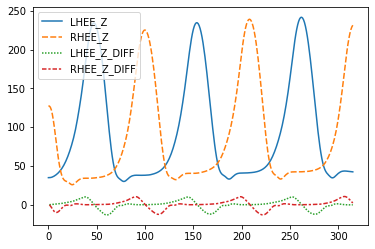

In [56]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])

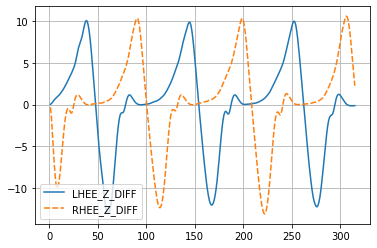

In [63]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()